In [2]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

Need to deal with the fact that DRC doesn't have clear school terms.  Instead, just have a minimum spacing of 6 weeks between subsequent doses.

Ideas:
- Sweep over, every 10 days, for first dose
- For each of d1, d2 is >= 6 weeks after.  Sweep every 10 days that satisfy this
- For each of d2, d3 is >= 6 weeks after and <= 6 weeks from d1+365.  Sweep every 10 days that satisfy this,

In [3]:
min_delta_doses = 50 #approximately 7 weeks

In [4]:
# t1 = np.arange(5,51+1) #Jan 5-Feb 20
# t2 = np.arange(60, 105+1)# Mar 1-mid Apr
# t3 = np.arange(121, 182+1) # May 1 - July 1
# t4 = np.arange(244, 288+1)# Sept 1- mid Oct
# t5 = np.arange(305, 349+1) # Nov - mid Dec
# central_school_days = np.concatenate([t1,t2,t3,t4,t5])

delta_time = 10
t1 = np.arange(5, 51, delta_time) # Jan 5-Feb 20
t2 = np.arange(60, 105, delta_time) # Mar 1-mid Apr
t3 = np.arange(121, 182, delta_time) # May 1 - July 1
t4 = np.arange(244, 288, delta_time) # Sept 1- mid Oct
t5 = np.arange(305, 349, delta_time) # Nov - mid Dec

end_day_list = [51,105,182,288,349]
term_list = [t1,t2,t3,t4,t5]
for i in range(5):
    end_day = end_day_list[i]
    if end_day not in term_list[i]:
        term_list[i] = np.append(term_list[i], end_day)
        
central_school_days = np.concatenate(term_list)
    
    
"""
delta_time = 10
t1_days = np.arange(15,105,delta_time)
t2_days = np.arange(135,227,delta_time)
t3_days = np.arange(244,335,delta_time)

if 105 not in t1_days:
    t1_days = np.append(t1_days, 105)
if 227 not in t2_days:
    t2_days = np.append(t2_days, 227)
if 335 not in t3_days:
    t3_days = np.append(t3_days, 335)
"""

# t1_possible = np.arange
# potential_campaign_days = 

'\ndelta_time = 10\nt1_days = np.arange(15,105,delta_time)\nt2_days = np.arange(135,227,delta_time)\nt3_days = np.arange(244,335,delta_time)\n\nif 105 not in t1_days:\n    t1_days = np.append(t1_days, 105)\nif 227 not in t2_days:\n    t2_days = np.append(t2_days, 227)\nif 335 not in t3_days:\n    t3_days = np.append(t3_days, 335)\n'

In [5]:
len(central_school_days)
print(34**3)

39304


In [6]:
d1_choices = central_school_days[central_school_days < 365-2*min_delta_doses]
# d1 = d1[d1<365-2*min_delta_doses]

df_list = []

for d1_option in d1_choices:
    d2_choices = central_school_days[np.logical_and(central_school_days >= d1_option + min_delta_doses,
                                                    central_school_days < 365 - min_delta_doses)]
    for d2_option in d2_choices:
        d3_choices = central_school_days[np.logical_and(central_school_days >= d2_option + min_delta_doses,
                                                        central_school_days < 365 + d1_option - min_delta_doses)]
        
        if len(d3_choices) > 0:
            df_list.append(pd.DataFrame({
                "term1_day": d1_option,
                "term2_day": d2_option,
                "term3_day": d3_choices
            }))
            #fixme Of course, these terms don't make as much sense here, but it's just easier for reusing code from other archetypes

            

In [7]:
central_school_days

array([  5,  15,  25,  35,  45,  51,  60,  70,  80,  90, 100, 105, 121,
       131, 141, 151, 161, 171, 181, 182, 244, 254, 264, 274, 284, 288,
       305, 315, 325, 335, 345, 349])

In [8]:
df = pd.concat(df_list)

In [9]:
df["scenario_number"] = np.arange(len(df))

In [10]:
df.to_csv("central_term_sweep_scenarios.csv", index=False)

In [11]:
df

,term1_day,term2_day,term3_day,scenario_number
0,5,60,121,0
1,5,60,131,1
2,5,60,141,2
3,5,60,151,3
4,5,60,161,4
...,...,...,...,...
0,182,284,335,1850
1,182,284,345,1851
2,182,284,349,1852
0,182,288,345,1853


# Output

In [12]:
df = pd.read_csv("timing_sweep_50f4222d-ccb4-eb11-a2e3-c4346bcb7275.csv")

In [13]:
timings_df = pd.read_csv("central_term_sweep_scenarios.csv")
df = pd.merge(df,timings_df, on="scenario_number")

In [14]:
df

,pfpr2_10,sim_id,exe_collection_id,input_collection_id,Run_Number,scenario_number,term1_day,term2_day,term3_day
0,0.394099,ffbe5f49-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,48,5,90,151
1,0.393215,3883f6f3-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,2,48,5,90,151
2,0.395831,4a9747a4-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,1,48,5,90,151
3,0.395973,56bf5f49-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,181,15,80,171
4,0.392703,659b44aa-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,1,181,15,80,171
...,...,...,...,...,...,...,...,...,...
4915,0.387620,2e0bc5ed-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,1,1799,171,284,345
4916,0.386601,c7af849d-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,1813,181,254,345
4917,0.381851,3d0bc5ed-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,1,1813,181,254,345
4918,0.390616,8baf849d-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,1754,161,244,335


In [15]:
t1 = df.groupby("term1_day").agg({"pfpr2_10": "median"}).reset_index()
t2 = df.groupby("term2_day").agg({"pfpr2_10": "median"}).reset_index()
t3 = df.groupby("term3_day").agg({"pfpr2_10": "median"}).reset_index()

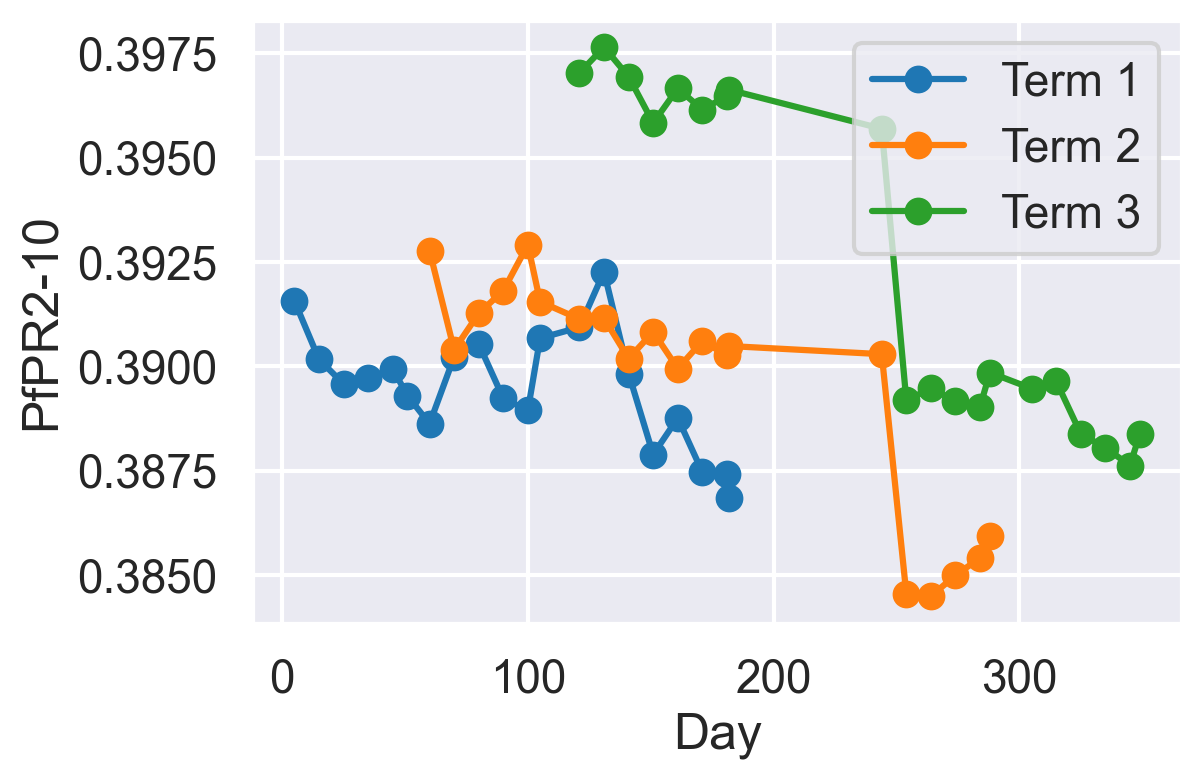

In [16]:
plt.figure(dpi=200)
plt.plot(t1["term1_day"], t1["pfpr2_10"], marker='o', label="Term 1")
plt.plot(t2["term2_day"], t2["pfpr2_10"], marker='o', label="Term 2")
plt.plot(t3["term3_day"], t3["pfpr2_10"], marker='o', label="Term 3")
# plt.axhline(baseline_pfpr, label="Baseline (no IPT)", color="C4", linestyle='dashed')
plt.xlabel("Day")
plt.ylabel("PfPR2-10")
plt.legend()
# plt.ylim([0.24,0.50])
# plt.savefig("sahel_timing_sweep_example.pdf")

In [17]:
set(df["term2_day"])

{60,
 70,
 80,
 90,
 100,
 105,
 121,
 131,
 141,
 151,
 161,
 171,
 181,
 182,
 244,
 254,
 264,
 274,
 284,
 288}

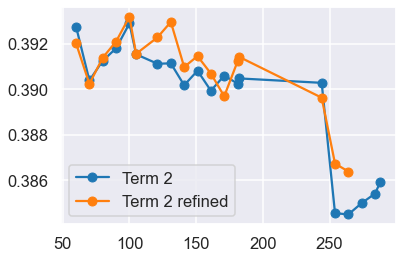

In [18]:
df_refine = df[df["term1_day"]==5]
t2_refine = df_refine.groupby("term2_day").agg({"pfpr2_10": "mean"}).reset_index()

plt.plot(t2["term2_day"], t2["pfpr2_10"], marker='o', label="Term 2")
plt.plot(t2_refine["term2_day"], t2_refine["pfpr2_10"], marker='o', label="Term 2 refined")
plt.legend()

In [19]:
set(df["term2_day"])

{60,
 70,
 80,
 90,
 100,
 105,
 121,
 131,
 141,
 151,
 161,
 171,
 181,
 182,
 244,
 254,
 264,
 274,
 284,
 288}

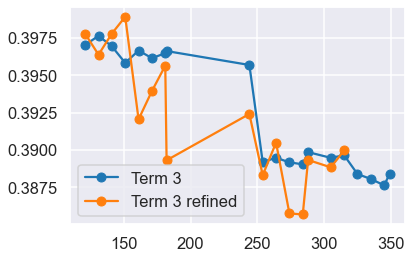

In [20]:
df_refine = df[np.logical_and(df["term1_day"]==5, df["term2_day"]==60)]
t3_refine = df_refine.groupby("term3_day").agg({"pfpr2_10": "mean"}).reset_index()

plt.plot(t3["term3_day"], t3["pfpr2_10"], marker='o', label="Term 3")
plt.plot(t3_refine["term3_day"], t3_refine["pfpr2_10"], marker='o', label="Term 3 refined")
plt.legend()

In [21]:
df.columns

Index(['pfpr2_10', 'sim_id', 'exe_collection_id', 'input_collection_id',
       'Run_Number', 'scenario_number', 'term1_day', 'term2_day', 'term3_day'],
      dtype='object')

In [22]:
df_agg = df.groupby("scenario_number").agg("mean").reset_index()

In [23]:
x = df_agg.sort_values(by="pfpr2_10").head(100)

(array([ 1.,  2.,  0.,  0.,  6., 13., 12.,  0., 21., 45.]),
 array([274. , 281.5, 289. , 296.5, 304. , 311.5, 319. , 326.5, 334. ,
        341.5, 349. ]),
 <BarContainer object of 10 artists>)

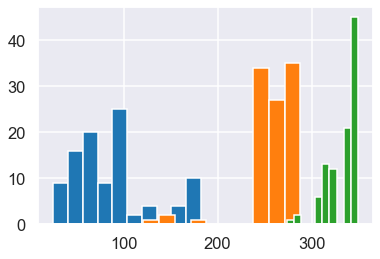

In [24]:
plt.hist(x["term1_day"])
plt.hist(x["term2_day"])
plt.hist(x["term3_day"])

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0., 33.,  0.,  0.,  0.,  0.,  0., 27.,  0.,  0.,  0.,  0.,  0.,
        20.,  0.,  0.,  0.,  0.,  0., 10.,  0.,  5.]),
 array([121.  , 122.67, 124.34, 126.01, 127.68, 129.35, 131.02, 132.69,
        134.36, 136.03, 137.7 , 139.37, 141.04, 142.71, 144.38, 146.05,
        147.72, 149.39, 151.06, 152.73, 154.4 , 156.07, 157.74, 159.41,
        161.08, 162.75, 164.42, 166.09, 167.76, 169.43, 171.1 , 172.77,
        174.44, 176.11, 177.78, 179.45, 181.12, 182.79, 184.46, 186.13,
        187.8 , 189.47, 191.14, 192.81, 194.48, 196.15, 197.82, 199.49,
  

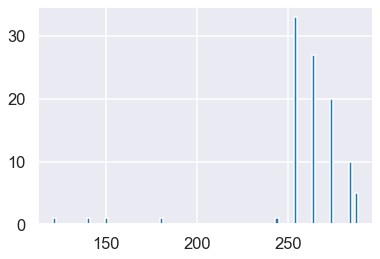

In [25]:
plt.hist(x["term2_day"], bins=100)

In [26]:
# So Term 2 day should be 254, 264, or 274

In [27]:
print(len(df_agg))
print(len(df_agg[np.in1d(df_agg["term2_day"], [254, 264,274])]))

1855
273


In [107]:
x2 = df_agg[np.in1d(df_agg["term2_day"], [254, 264,274])].sort_values(by="pfpr2_10").head(20)

(array([ 2.,  0.,  1.,  0.,  2.,  0.,  4.,  0.,  0., 11.]),
 array([305. , 309.4, 313.8, 318.2, 322.6, 327. , 331.4, 335.8, 340.2,
        344.6, 349. ]),
 <BarContainer object of 10 artists>)

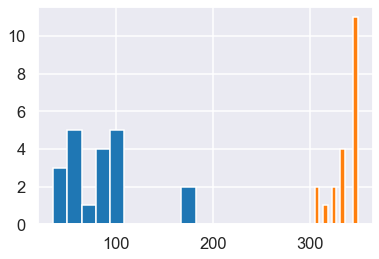

In [110]:
plt.hist(x2["term1_day"])
plt.hist(x2["term3_day"])

In [112]:
set(x2["term3_day"])

{305.0, 315.0, 325.0, 335.0, 345.0, 349.0}

In [ ]:
# So Term 3 day should be 349

In [28]:
h = df_agg[np.logical_and(np.in1d(df_agg["term2_day"], [254, 264,274]),
                         df_agg["term3_day"]==349)]
x3 = h.sort_values(by="pfpr2_10")

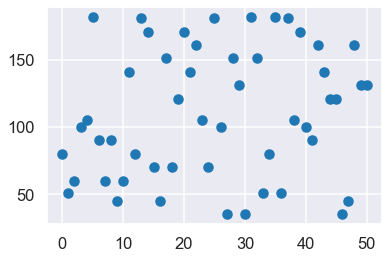

In [32]:
plt.scatter(np.arange(len(x3)),x3["term1_day"])

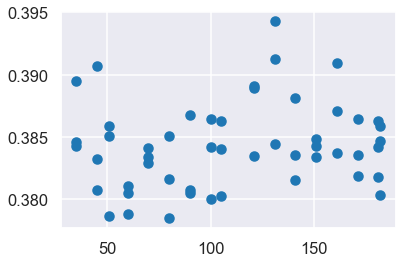

In [34]:
plt.scatter(x3["term1_day"], x3["pfpr2_10"])

In [36]:
set(x3["term1_day"])

{35.0,
 45.0,
 51.0,
 60.0,
 70.0,
 80.0,
 90.0,
 100.0,
 105.0,
 121.0,
 131.0,
 141.0,
 151.0,
 161.0,
 171.0,
 181.0,
 182.0}

In [ ]:
# So term 1 day is 60

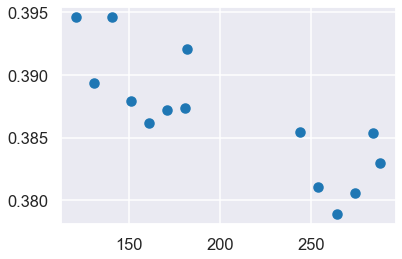

In [37]:
x4 = df_agg[np.logical_and(df_agg["term1_day"]==60,
                           df_agg["term3_day"]==349)]
plt.scatter(x4["term2_day"], x4["pfpr2_10"])

In [38]:
set(x4["term2_day"])

{121.0,
 131.0,
 141.0,
 151.0,
 161.0,
 171.0,
 181.0,
 182.0,
 244.0,
 254.0,
 264.0,
 274.0,
 284.0,
 288.0}

Best:
- term1_day = 60
- term2_day = 264
- term3_day = 349

c:\users\jsuresh\venv\default_venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


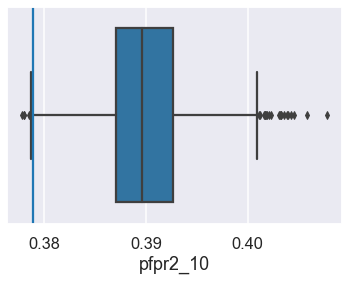

In [44]:
# sns.boxplot(df["pfpr2_10"])
sns.boxplot(df_agg["pfpr2_10"])
plt.axvline(0.378861)

In [42]:
df_agg.sort_values(by="pfpr2_10").head(20)

,scenario_number,pfpr2_10,Run_Number,term1_day,term2_day,term3_day
643,643,0.377863,1.0,35.0,254.0,335.0
1420,1420,0.377970,0.5,90.0,274.0,345.0
1424,1424,0.378007,0.5,90.0,284.0,349.0
1314,1314,0.378469,0.5,80.0,254.0,349.0
1324,1324,0.378623,0.5,80.0,284.0,335.0
1311,1311,0.378626,0.5,80.0,254.0,325.0
948,948,0.378689,1.0,51.0,254.0,349.0
1086,1086,0.378703,1.0,60.0,284.0,345.0
640,640,0.378710,1.0,35.0,254.0,305.0
1080,1080,0.378861,1.0,60.0,264.0,349.0


In [35]:
from scipy.stats import mode

ModeResult(mode=array([90], dtype=int64), count=array([22]))
ModeResult(mode=array([181], dtype=int64), count=array([28]))


(array([ 6.,  8.,  0., 10.,  0., 14.,  0., 20.,  0., 42.]),
 array([131. , 136.1, 141.2, 146.3, 151.4, 156.5, 161.6, 166.7, 171.8,
        176.9, 182. ]),
 <BarContainer object of 10 artists>)

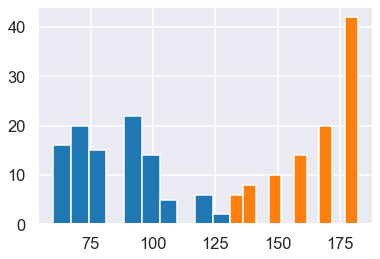

In [37]:
print(mode(y["term2_day"]))
print(mode(y["term3_day"]))
plt.hist(y["term2_day"])
plt.hist(y["term3_day"])

In [38]:
y

,pfpr2_10,sim_id,exe_collection_id,input_collection_id,Run_Number,scenario_number,term1_day,term2_day,term3_day
360,0.257759,fbccfe17-2eb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,41,5,80,181
40,0.257759,02cdfe17-2eb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,48,5,80,181
271,0.260613,e7e0a56b-2eb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,2,25,5,70,182
106,0.260737,11cdfe17-2eb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,23,5,70,171
382,0.260737,19cdfe17-2eb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,31,5,70,171
...,...,...,...,...,...,...,...,...,...
242,0.270000,dd5dd447-2eb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,1,62,5,90,181
79,0.270000,cd5dd447-2eb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,1,56,5,90,181
311,0.270090,e85dd447-2eb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,1,70,5,100,182
175,0.270176,06cdfe17-2eb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,52,5,90,141


In [45]:
z = df[np.logical_and(df["term1_day"]==5, df["term3_day"]==181)].reset_index(drop=True)  #["pfpr2_10"]

(array([ 1.25663344,  9.14549895, 20.50174192, 26.55219924, 26.04023747,
        16.2664218 ,  7.72596858,  2.76924777,  0.74467167,  0.27925188]),
 array([0.25775908, 0.26674527, 0.27573146, 0.28471765, 0.29370384,
        0.30269003, 0.31167622, 0.32066241, 0.3296486 , 0.33863478,
        0.34762097]),
 [<matplotlib.patches.Polygon at 0x130ff52d5f8>])

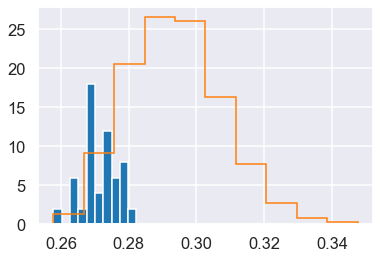

In [44]:
plt.hist(z["pfpr2_10"])
plt.hist(df["pfpr2_10"],histtype='step', density=True)

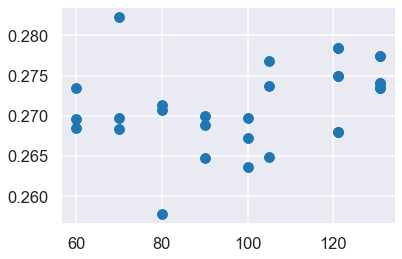

In [48]:
plt.scatter(z["term2_day"], z["pfpr2_10"])

In [50]:
s = z[z["term2_day"]==100]

In [52]:
term1_day = 5 # Jan 5
term2_day = 100 # April 10
term3_day = 181 # June

# Redoing

In [88]:
x = df.sort_values(by="pfpr2_10").head(100)

In [89]:
x

,pfpr2_10,sim_id,exe_collection_id,input_collection_id,Run_Number,scenario_number,term1_day,term2_day,term3_day
3621,0.371285,a469fa74-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,1086,60,284,345
95,0.372562,1534ccbd-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,1,640,35,254,305
1441,0.372866,9769fa74-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,1071,60,254,315
2343,0.373271,ef24d5c3-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,1,816,45,284,345
4547,0.373512,f168fa74-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,898,51,161,335
...,...,...,...,...,...,...,...,...,...
1282,0.378361,4e5d1156-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,362,25,100,274
1337,0.378400,3d9d095c-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,511,35,100,305
554,0.378400,ec28026f-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,807,45,264,325
399,0.378492,92af849d-ccb4-eb11-a2e3-c4346bcb7275,cb8d1f2b-44c8-ea11-a2c6-c4346bcb1557,d79eb282-6ca8-eb11-a2e3-c4346bcb7275,0,1761,161,254,345
